### 일원분산분석 개요

- 목적 : 셋 이상의 그룹 간 차이가 존재하는지를 확인하기 위한 가설 검정 방법
- 영가설 : 세그룹의 표본평군은 같다
- 대립가설 : 최소한 한 개 그룹에는 차이를 보인다.


### 선행조건
- 독립성 : 모든 그룹은 서로 독립적이어야 한다.
- 정규성 : 데이터는 정규분포를 따라야 함
    - 만약, 정규성을 띄지 않으면 비모수적인 방법인 부호검정을 진행
    
- 등분산성 : 그룹의 데이터에 대한 분산이 같아야함
    - Levene의 등분산 검정 : p-value가 0.05 미만이면 분산이 다르다고 판단
    - 분산이 같은지 다른지에 따라 사용하는 통계량이 달라지므로, 비모수적인 방법을 수행해야 한다.
![](pic/일원통계.png)
![](pic/일원분산절차.PNG)

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import *

%precision 3
np.random.seed(1111)


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [6]:
df = pd.read_csv("../../data/data/지점별_일별판매량.csv", engine = "python", encoding='euc-kr')
df.head()


,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


- 각 지점의 판매량의 평균 차이가 있는지 확인
- 변수가 2개를 초과하므로 아노바 분석(일원분산분석)
    
    - 귀무가설 : 모든 그룹의 평균이 같다.
    - 대립가설 : 최소한 한개 그룹이라도 평균이 다르다
 
### 지점별 7월 판매량간의 유의미한 차이가 있는가?

- 정규성을 모든집단에 대해 정규성검사해서 정규성이 없으면 다른분석
- 모든 집단에 대해 등분산확인 후 분산이 같지않으면 다른 분석

- ===>Kruskal-Wallis H Test를 수행해야 함(비모수적인방법)


In [7]:
# 데이터 분할 (결측치 제거)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values


{'whiskers': [<matplotlib.lines.Line2D at 0x1ef6d763bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef6d77e2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef6d763850>,
 'medians': [<matplotlib.lines.Line2D at 0x1ef6d77e970>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ef6d77ecd0>,
 'means': []}

([<matplotlib.axis.XTick at 0x1ef6d0a6340>,
 [Text(1, 0, '지점A'), Text(2, 0, '지점B'), Text(3, 0, '지점C')])

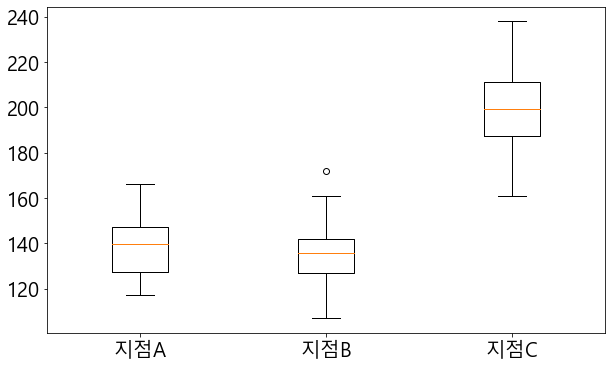

In [8]:
## 박스 플롯으로 시각화
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt

from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)

plt.boxplot([A,B,C])

plt.xticks([1,2,3],['지점A','지점B','지점C'])




In [12]:
# 정규성 검정
# pvalue가 유의수준 보다 작으므로 정규분포를 띈다
kstest(A,'norm')
kstest(B,'norm')
kstest(C,'norm')


KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

In [13]:
# 등분산성 검정
levene(A,B,C)
# pvalue가 0.05보다 크므로 귀무가설 채택(세그룹의 분산성 동일하다)


LeveneResult(statistic=1.244640322359082, pvalue=0.2931218868935245)

In [14]:
f_oneway(A,B,C)

# pvalue가 거의 0에 수렴 => A,B,C 평균에서 최소 어느 한 집단은 유의한 차이가 존재


F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)

(90, 90)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B     -1.4   0.9 -10.5745  7.7745  False
     A      C  62.2333 0.001  53.0589 71.4078   True
     B      C  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


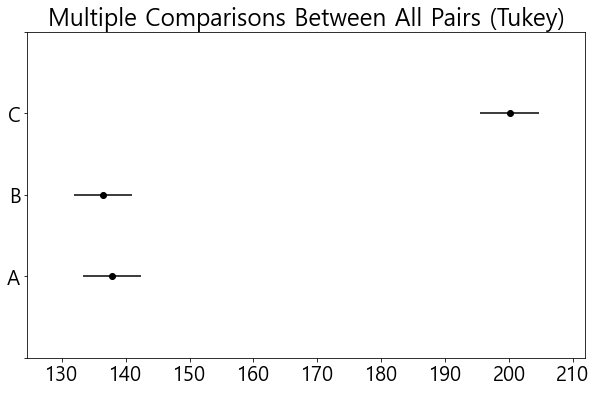

In [9]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Data = A.tolist() + B.tolist() + C.tolist()
Group = ['A'] * len(A) + ['B']  * len(B) + ['C'] * len(C)
len(Data), len(Group)

posthoc = pairwise_tukeyhsd(Data, Group)

print(posthoc) # 결과를 보려면 print()  사용해야 함
# reject 결과를 확인 : 
# [A,B] | [C] 로 데이터가 구분됨
# 세 변수에서 C는 다른 집단과 유의한 차이가 존재한다.

fig = posthoc.plot_simultaneous()